## Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from implementations import data_viz, data_missing, data_format, data_clean, data_filter

In [2]:
# Data Path
DATA_PATH = '../data/'
MOVIES_FOLDER = DATA_PATH+'MovieSummaries/'
MOVIES_DATASET = MOVIES_FOLDER+"movie.metadata.tsv"

# Load Data
df = pd.read_csv(MOVIES_DATASET, sep='\t', names=['id_wiki','id_freebase','name','date',
                                                  'box_office','runtime','lang','countries','genres'])

## Enrich Data
- filter
- transform data according to our needs
- new datasets

How data description changed from raw data ?

In [3]:
movies = df.copy()

# Handle missing values
movies = data_missing(movies)

# Format data types
movies = data_format(movies)

# Clean data, outliers and features
movies = data_clean(movies)

# Filter data
movies = data_filter(movies)

In [4]:
print("Size Movies (filtered)", len(movies))
# data_viz(movies)

Size Movies (filtered) 8328


### additional dataset: ml-25m

This dataset contains 5-star rating and free-text tagging activity of a movie recommondation website, [MovieLens](http://movielens.org). There are ~25 million ratings and ~1 million tags of a total of 62'423 movies. The dataset can be found [here](https://grouplens.org/datasets/movielens/). We are interested in the movie ratings only. 

In [5]:
## additional dataset
# Data Path
# DATA_PATH = '../data/'
MOVIELENS_FOLDER = DATA_PATH+'ml-25m/'
MOVIELENS_MOVIES = MOVIELENS_FOLDER+"movies.csv"

# Load Data
movies = pd.read_csv(MOVIELENS_MOVIES, sep=',')

display(movies)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [6]:
moviesf = movies.copy(deep=True).drop(['title','genres'], axis=1)

# separate year from title
sep = movies['title'].str.extract(r'(.*)\((\d{4})\)', expand=True)
moviesf[['title','year']] = sep.iloc[:,0:2]
# drop all entries with missing title
moviesf = moviesf[moviesf['title'].isnull() == False]
moviesf['year'] = moviesf['year'].map(int)

# extract first 3 genres
gen = movies['genres'].str.split('|',expand=True).replace({'(no genres listed)':None})
moviesf[['genre1','genre2','genre3']] = gen.iloc[:,0:3]


display(moviesf)

,movieId,title,year,genre1,genre2,genre3
0,1,Toy Story,1995,Adventure,Animation,Children
1,2,Jumanji,1995,Adventure,Children,Fantasy
2,3,Grumpier Old Men,1995,Comedy,Romance,None
3,4,Waiting to Exhale,1995,Comedy,Drama,Romance
4,5,Father of the Bride Part II,1995,Comedy,None,None
...,...,...,...,...,...,...
62418,209157,We,2018,Drama,None,None
62419,209159,Window of the Soul,2001,Documentary,None,None
62420,209163,Bad Poems,2018,Comedy,Drama,None
62421,209169,A Girl Thing,2001,None,None,None


In [7]:
# check if we have strange data for years
print('The movies range between {} and {}.'.format(moviesf.year.min(), moviesf.year.max()))

The movies range between 1874 and 2019.


In [8]:
# percentage of genre missing
sz = moviesf.movieId.size
g1 = moviesf[moviesf['genre1'].isnull()].movieId.size/sz*100
g2 = moviesf[moviesf['genre2'].isnull()].movieId.size/sz*100
g3 = moviesf[moviesf['genre3'].isnull()].movieId.size/sz*100

print(g1, g2, g3)

7.737087384903166 48.83330914485672 78.31261187170432


In [9]:
# ratings
MOVIELENS_RATINGS = MOVIELENS_FOLDER+"ratings.csv"
ratings = pd.read_csv(MOVIELENS_RATINGS, sep=',')

display(ratings)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [10]:
ratingsf = ratings.groupby(['movieId'])[['rating']].mean()
ratingsf['count'] = ratings.groupby(['movieId'])[['rating']].count()
display(ratingsf)

,rating,count
movieId,,
1,3.893708,57309
2,3.251527,24228
3,3.142028,11804
4,2.853547,2523
5,3.058434,11714
...,...,...
209157,1.500000,1
209159,3.000000,1
209163,4.500000,1


In [11]:
# ! maybe we want to include a minimum number of rankings per movie?
# only keep movies with more than 100 rankings
ratingsff = ratingsf[ratingsf['count'] > 100]
display(ratingsff)

,rating,count
movieId,,
1,3.893708,57309
2,3.251527,24228
3,3.142028,11804
4,2.853547,2523
5,3.058434,11714
...,...,...
203519,3.031847,157
204352,3.383784,185
204542,3.139474,190


(array([   7.,   32.,  110.,  297.,  735., 1536., 2648., 3191., 1644.,
          91.]),
 array([0.89903846, 1.25744422, 1.61584999, 1.97425575, 2.33266151,
        2.69106727, 3.04947304, 3.4078788 , 3.76628456, 4.12469032,
        4.48309609]),
 <BarContainer object of 10 artists>)

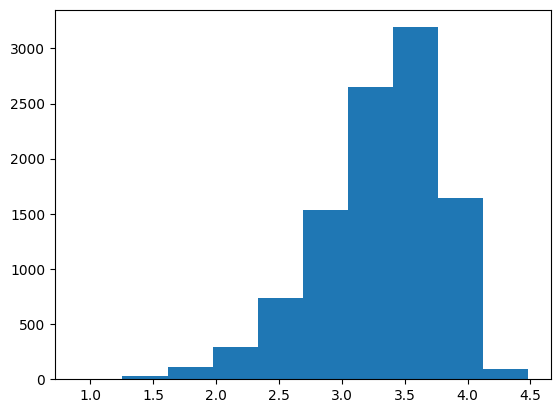

In [12]:
# check distribution of rankings

plt.hist(ratingsff.rating)

In [13]:
# add ranking to movies
# inner merge, so we only keep movies that have a ranking
movie_ratings = moviesf.merge(ratingsff, how='inner', on='movieId')

display(movie_ratings)

,movieId,title,year,genre1,genre2,genre3,rating,count
0,1,Toy Story,1995,Adventure,Animation,Children,3.893708,57309
1,2,Jumanji,1995,Adventure,Children,Fantasy,3.251527,24228
2,3,Grumpier Old Men,1995,Comedy,Romance,None,3.142028,11804
3,4,Waiting to Exhale,1995,Comedy,Drama,Romance,2.853547,2523
4,5,Father of the Bride Part II,1995,Comedy,None,None,3.058434,11714
...,...,...,...,...,...,...,...,...
10272,203519,Fast & Furious Presents: Hobbs & Shaw,2019,Action,None,None,3.031847,157
10273,204352,Ad Astra,2019,Adventure,Drama,Mystery,3.383784,185
10274,204542,It: Chapter Two,2019,Horror,None,None,3.139474,190
10275,204698,Joker,2019,Crime,Drama,Thriller,4.050733,818


In [14]:
# links movieID (from movieLens) to IMDB ID and TMBD ID
MOVIELENS_LINKS = MOVIELENS_FOLDER+"links.csv"
links = pd.read_csv(MOVIELENS_LINKS, sep=',')

display(links)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [15]:
# merge movie ids
movie_ratings = movie_ratings.merge(links, how='inner', on='movieId')
movie_ratings = movie_ratings.rename(columns={'movieId':'movieID','title':'name'}, errors="raise")

display(movie_ratings)

,movieID,name,year,genre1,genre2,genre3,rating,count,imdbId,tmdbId
0,1,Toy Story,1995,Adventure,Animation,Children,3.893708,57309,114709,862.0
1,2,Jumanji,1995,Adventure,Children,Fantasy,3.251527,24228,113497,8844.0
2,3,Grumpier Old Men,1995,Comedy,Romance,None,3.142028,11804,113228,15602.0
3,4,Waiting to Exhale,1995,Comedy,Drama,Romance,2.853547,2523,114885,31357.0
4,5,Father of the Bride Part II,1995,Comedy,None,None,3.058434,11714,113041,11862.0
...,...,...,...,...,...,...,...,...,...,...
10272,203519,Fast & Furious Presents: Hobbs & Shaw,2019,Action,None,None,3.031847,157,6806448,384018.0
10273,204352,Ad Astra,2019,Adventure,Drama,Mystery,3.383784,185,2935510,419704.0
10274,204542,It: Chapter Two,2019,Horror,None,None,3.139474,190,7349950,474350.0
10275,204698,Joker,2019,Crime,Drama,Thriller,4.050733,818,7286456,475557.0


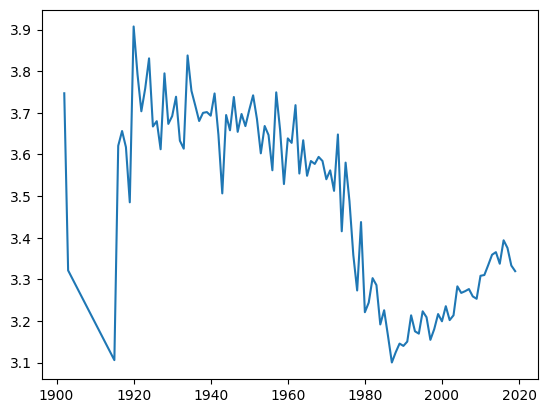

In [16]:
# visualize yearly ratings
yearly = movie_ratings.groupby(['year'])[['rating']].mean()
plt.plot(yearly)

In [17]:
# we need a link from any of those IDs (IMDb or TMDb) to wikiID or freebaseID for merging dataframes

# can't find :(

In [18]:
combined = df.merge(movie_ratings, how='inner', on='name')
combined

,id_wiki,id_freebase,name,date,box_office,runtime,lang,countries,genres,movieID,year,genre1,genre2,genre3,rating,count,imdbId,tmdbId
